# 3-D Red Refinement

It subdivides each tetrahedron in a triangulation into eight
subtetrahedra of equal volume. The ordering of sub-tetrahedron is choosen so that recursive application to any initial tetrahedron yields elements of at most three congruence classes. Starting from a suitable ordered initial mesh (dividing one cube into six tetrahedron), `uniformrefine3` is used in `cubemesh.m` to produce a
uniform mesh of a cube.

> Note that sub-tetrahedron may not be always positive ordered. 

## Refinement

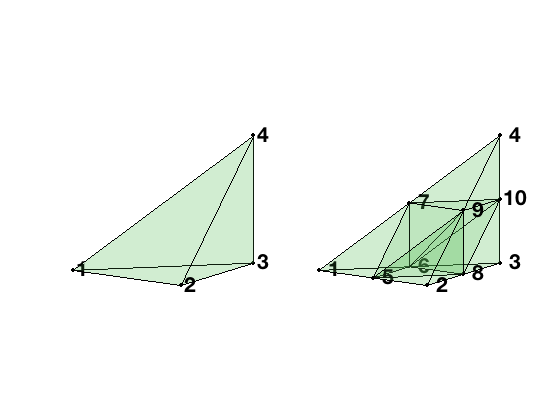

In [1]:
node = [0,0,0; 1,0,0; 1,1,0; 1,1,1];
elem = [1 2 3 4];
figure(1); subplot(1,2,1);
set(gcf,'Units','normal'); set(gcf,'Position',[0.25,0.25,0.5,0.5]);
showmesh3(node,elem,[],'FaceAlpha',0.15); view([34 12]);
findnode3(node);
[node,elem] = uniformrefine3(node,elem);
figure(1); subplot(1,2,2);
showmesh3(node,elem,[],'FaceAlpha',0.15); view([34 12]);
findnode3(node);

After cutting the four corner, the remaining octahedron should be divided into four tetrahedron by using one of three diagonals. Here follow Bey we always use diagonal 6-9. The ordering of sub-tetrahedron is choosen so that recursive application to any initial tetrahedron yields elements of at most three congruence classes and may not be positive ordered. To get positive ordering, use `fixorder3`.

In [ ]:
[tempvar,idx] = fixorder3(node,elem);
display(idx);


idx =

     6
     8



The orientation of the 6-th and 8-th children has been changed by `fixorder3` which means `uniformrefine3` will produces tetrahedrons with negagives volume.

## Dependence of the Initial Mesh

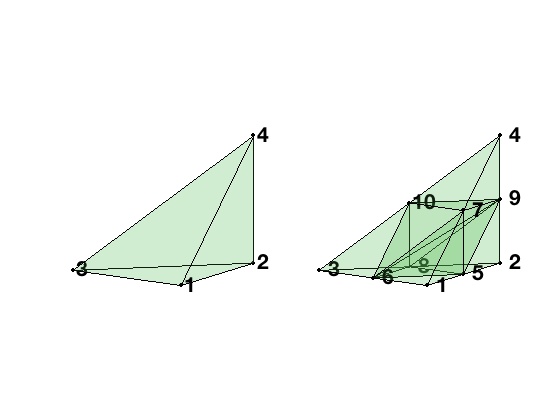

In [1]:
node = [1,0,0; 1,1,0; 0,0,0; 1,1,1];
elem = [1 2 3 4];
set(gcf,'Units','normal'); set(gcf,'Position',[0.25,0.25,0.5,0.5]);
figure(1); subplot(1,2,1);
showmesh3(node,elem,[],'FaceAlpha',0.15); view([34 12]);
findnode3(node);
[node,elem] = uniformrefine3(node,elem);
figure(1); subplot(1,2,2);
showmesh3(node,elem,[],'FaceAlpha',0.15); view([34 12]);
findnode3(node);

The initial mesh is still positive but after one uniform refinement the diagonal 6-9 is longer than 5-10. Therefore the refined mesh is less shape regular although
still three congruence classes are possible. To have a better mesh quality, one may want to use the shorter one (implemented in `uniformrefine3l`). The subroutine `uniformrefine3`
didn't compute the edge length. The mesh quality will depend on the ordering of the initial mesh. 

In [7]:
node = [0,0,0; 1,0,0; 0,1,0; 0,0,1];
elem = [1 2 3 4];
for k = 1:4
    [node,elem] = uniformrefine3(node,elem);
    meshquality(node,elem);
end

 - Min quality 0.6230 - Mean quality 0.7011 
 - Min quality 0.6230 - Mean quality 0.6934 
 - Min quality 0.6230 - Mean quality 0.6915 
 - Min quality 0.6230 - Mean quality 0.6910 


We test the quality of meshes obtained by `uniformrefine3` for this 
initial mesh. The mean of the mesh quality is changing while the
minimial is bounded below.

In [8]:
node = [0,0,0; 1,0,0; 1,1,0; 1,1,1];
elem = [1 2 3 4];
for k = 1:4
    [node,elem] = uniformrefine3(node,elem);
    meshquality(node,elem);
end

 - Min quality 0.7174 - Mean quality 0.7174 
 - Min quality 0.7174 - Mean quality 0.7174 
 - Min quality 0.7174 - Mean quality 0.7174 
 - Min quality 0.7174 - Mean quality 0.7174 


If we use the first example, as the correct diagonal used, `min=mean` which means all elements are in the same type.

## Uniform Meshes of a Cube

 - Min quality 0.7174 - Mean quality 0.7174 
 - Min quality 0.7174 - Mean quality 0.7174 
 - Min quality 0.7174 - Mean quality 0.7174 


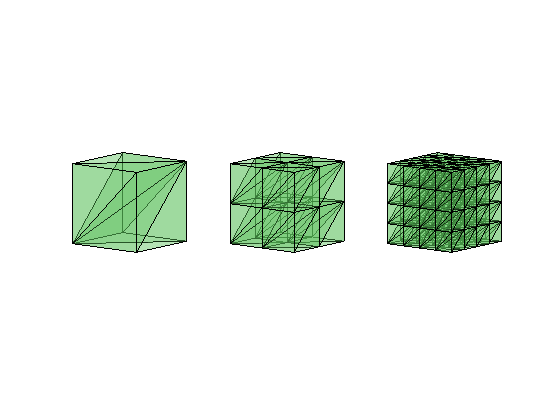

In [6]:
node = [-1,-1,-1; 1,-1,-1; 1,1,-1; -1,1,-1; -1,-1,1; 1,-1,1; 1,1,1; -1,1,1]; 
elem = [1 2 3 7; 1 4 3 7; 1 5 6 7; 1 5 8 7; 1 2 6 7; 1 4 8 7];

figure(1); subplot(1,3,1); 
showmesh3(node,elem,[],'FaceAlpha',0.25); view([38 10]);
meshquality(node,elem);

[node,elem] = uniformrefine3(node,elem);
figure(1); subplot(1,3,2);
showmesh3(node,elem,[],'FaceAlpha',0.25); view([38 10]);
meshquality(node,elem);

[node,elem] = uniformrefine3(node,elem);
figure(1); subplot(1,3,3);
showmesh3(node,elem,[],'FaceAlpha',0.25); view([38 10]);
meshquality(node,elem);

Starting from a suitable ordered initial mesh (dividing one cube into six tetrahedron), `uniformrefine3`, which is used in `cubemesh.m`, will produce a
uniform mesh of a cube. In the output of mesh quality, `min = mean` means all tetrahedron are in one type. *Again the obtained tetrahedron may not be all positive ordered*. 

## Test boundary flag

In [10]:
node = [-1,-1,-1; 1,-1,-1; 1,1,-1; -1,1,-1; -1,-1,1; 1,-1,1; 1,1,1; -1,1,1]; 
elem = [1 2 3 7; 1 4 3 7; 1 5 6 7; 1 5 8 7; 1 2 6 7; 1 4 8 7];
bdFlag = setboundary3(node,elem,'Dirichlet');
for k = 1:2
    [node,elem,bdFlag] = uniformrefine3(node,elem,bdFlag);
    bdFlagnew = setboundary3(node,elem,'Dirichlet');
    display(any(any(bdFlag - bdFlagnew)));
end


ans =

     0


ans =

     0



`bdFlag` obtained by `uniformrefine3` is the same as `bdFlagnew` by finding boundary faces of the triangulation.

## Reference

- J. Bey. Simplicial grid refinement: on Freudenthal's algorithm and the
optimal number of congruence classes. *Numer. Math.* 85(1):1--29, 2000.
p11 Algorithm: RedRefinement3D. 
- S. Zhang. Successive subdivisions of tetrahedra and multigrid methods
on tetrahedral meshes. *Houston J. Math.* 21, 541-556, 1995.